# Machine Learning Engineer Nanodegree
## Deep Learning
## Project: Build a Digit Recognition Program

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

----
## Step 1: Design and Test a Model Architecture
Design and implement a deep learning model that learns to recognize sequences of digits. Train the model using synthetic data generated by concatenating character images from [notMNIST](http://yaroslavvb.blogspot.com/2011/09/notmnist-dataset.html) or [MNIST](http://yann.lecun.com/exdb/mnist/). To produce a synthetic sequence of digits for testing, you can for example limit yourself to sequences up to five digits, and use five classifiers on top of your deep network. You would have to incorporate an additional ‘blank’ character to account for shorter number sequences.

There are various aspects to consider when thinking about this problem:
- Your model can be derived from a deep neural net or a convolutional network.
- You could experiment sharing or not the weights between the softmax classifiers.
- You can also use a recurrent network in your deep neural net to replace the classification layers and directly emit the sequence of digits one-at-a-time.

Here is an example of a [published baseline model on this problem](http://static.googleusercontent.com/media/research.google.com/en//pubs/archive/42241.pdf). ([video](https://www.youtube.com/watch?v=vGPI_JvLoN0))

### Implementation
Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [2]:
from __future__ import print_function
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data
import numpy as np
import os
import sys
import tarfile
import tensorflow as tf
from IPython.display import display, Image
from scipy import ndimage
from six.moves.urllib.request import urlretrieve
from six.moves import cPickle as pickle
import PIL.Image as Image
from scipy import ndimage
from six.moves.urllib.request import urlretrieve
import h5py
import random
import matplotlib.gridspec as gridspec
%matplotlib inline

In [3]:
mnist_datasets = input_data.read_data_sets("MNIST_dataset/", one_hot=False)

Extracting MNIST_dataset/train-images-idx3-ubyte.gz
Extracting MNIST_dataset/train-labels-idx1-ubyte.gz
Extracting MNIST_dataset/t10k-images-idx3-ubyte.gz
Extracting MNIST_dataset/t10k-labels-idx1-ubyte.gz


In [4]:
def get_image(images_batch):
    random_index = np.random.randint(0, 200)
    return random_index,images_batch[random_index, :, :]

In [31]:
from scipy.misc import imresize

#Max no. of digits in any sequence
max_digits = 5

#Original size of MNIST images
orig_size = 28 

#Size of concatenated images
syn_size = 32

#No. of concatenated images to generate
num_dataset = 100000

#os.makedirs('Concatenated_data/')
#os.rmdir('Concatenated_data/')

concat_images = np.ones([num_dataset,syn_size,syn_size,1])
concat_labels = np.full((num_dataset,max_digits+1), 10, dtype=int)

#print concat_labels.shape

dataset_count = 0

while dataset_count<num_dataset:
    
    
    images_batch, labels_batch = mnist_datasets.train.next_batch(200)
    images_batch = np.reshape(images_batch,[-1,orig_size,orig_size])
    
    #Get the first image randomly from the batch
    first_index , concat_sequence = get_image(images_batch)
    
    #Update the label accordingly
    concat_label = labels_batch[first_index]
    
    digits_added = 1
    
    #No of digits to add
    digits_to_add = int(np.random.random()//(1.0/max_digits))
    t = np.random.random()
#     print t
#     print 1.0/max_digits
#     print t//0.2
#     i = 0
    for i in xrange(0,int(t//0.2)):
        #Get the next image from batch
        image_id , image_add = get_image(images_batch)
        digits_added +=1
        #randomly shift the digits
        rand_shift = np.random.randint(-orig_size,orig_size)
        rand_shift =0
        
        if rand_shift == 0:
            #img_result = np.concatenate((img1, img2), axis=1)
            concat_sequence = np.concatenate((concat_sequence,image_add),axis=1)
#         else:
#             if rand_shift<0:
#                 concat_sequence = np.co
        
        concat_label = np.append(concat_label,labels_batch[image_id])
    #print "i =="
#     print digits_added
#     print concat_label
    if (max_digits- digits_added )> 0:
        #print "inside if"
        concat_label = np.append(concat_label,[10]*(max_digits-digits_added))
    print(concat_label)
    concat_sequence = np.reshape(imresize(concat_sequence,(syn_size,syn_size)),[1,syn_size,syn_size,1])
    
    #Subtract mean from image    
    #http://stats.stackexchange.com/questions/211436/why-do-we-normalize-images-by-subtracting-the-datasets-image-mean-and-not-the-c
    concat_sequence = concat_sequence - np.mean(concat_sequence,dtype='float32')
    
    concat_images[dataset_count,:,:,:] = concat_sequence
    concat_labels[dataset_count,:] = np.append(digits_added, concat_label)
    
    dataset_count+=1
print(concat_images.shape)
print(concat_labels.shape)

[9 0 6 0 8]
[ 1  4  5  6 10]
[1 0 6 8 6]
[ 3 10 10 10 10]
[ 1  6  3 10 10]
[ 1  2  3 10 10]
[ 7  4  1 10 10]
[ 1 10 10 10 10]
[5 1 7 5 0]
[ 2  2 10 10 10]
[6 5 5 1 7]
[ 1  0  7  2 10]
[ 5  1  1  1 10]
[1 1 1 9 4]
[ 6  6  0 10 10]
[ 8  1 10 10 10]
[ 3  7 10 10 10]
[ 6  4  2 10 10]
[ 9  0  0  6 10]
[ 7  1  7 10 10]
[ 6  0  7  9 10]
[ 8 10 10 10 10]
[ 4  6  5 10 10]
[ 6  7  8 10 10]
[ 3  8 10 10 10]
[ 8  5  7 10 10]
[2 1 2 3 1]
[ 4  6 10 10 10]
[ 4  4  3  5 10]
[ 5 10 10 10 10]
[ 5  4  9 10 10]
[5 0 1 5 4]
[ 4  6  9 10 10]
[ 1  9  6 10 10]
[ 0  2  3 10 10]
[5 3 2 5 8]
[ 4 10 10 10 10]
[ 5  8 10 10 10]
[ 7  5 10 10 10]
[ 1 10 10 10 10]
[ 5  6 10 10 10]
[0 3 4 1 1]
[ 4 10 10 10 10]
[ 9 10 10 10 10]
[ 2 10 10 10 10]
[ 1 10 10 10 10]
[ 9  3  7  6 10]
[ 0  6  1 10 10]
[4 3 1 6 1]
[1 1 3 8 3]
[1 4 4 7 6]
[ 6 10 10 10 10]
[ 7  2  7 10 10]
[ 7  5 10 10 10]
[ 8  0  5  1 10]
[ 6  2 10 10 10]
[ 8  0 10 10 10]
[ 0  8  8  7 10]
[ 7  8 10 10 10]
[ 4  6 10 10 10]
[ 4  7 10 10 10]
[ 8  3  4  7 10]
[7 4 9

KeyboardInterrupt: 

In [32]:
print(concat_labels[0])

[5 9 0 6 0 8]


In [20]:
train_img,validation_img,test_img = np.split(concat_images, [int(.7*len(concat_images)), int(.85*len(concat_images))])
train_label,validation_label,test_label = np.split(concat_labels, [int(.7*len(concat_labels)), int(.85*len(concat_labels))])

In [21]:
print(train_img.shape,validation_img.shape,test_img.shape)
print(train_label.shape,validation_label.shape,test_label.shape)

(70000, 32, 32, 1) (15000, 32, 32, 1) (15000, 32, 32, 1)
(70000, 6) (15000, 6) (15000, 6)


In [22]:
pickle_file = os.path.join('concat_MNIST', 'concatenatedMNIST.pickle')

try:
  f = open(pickle_file, 'wb')
  save = {
    'train_dataset': train_img,
    'train_labels': train_label,
    'valid_dataset': validation_img,
    'valid_labels': validation_label,
    'test_dataset': test_img,
    'test_labels': test_label,
    }
  pickle.dump(save, f, pickle.HIGHEST_PROTOCOL)
  f.close()
except Exception as e:
  print('Unable to save data to', pickle_file, ':', e)
  raise
    


In [23]:
statinfo = os.stat(pickle_file)
print('Compressed pickle size:', statinfo.st_size)

Compressed pickle size: 824000456


In [25]:
def accuracy(predictions, labels):
    return (100.0 * np.sum(np.argmax(predictions, 2).T == labels) / predictions.shape[1] / predictions.shape[0])


In [26]:
image_size = 32
num_labels = 11  # 0-9, + blank 
num_channels = 1 # grayscale
num_digits = 5

batch_size = 64
patch1_size = 3
patch2_size = 5
depth1 = 1
depth2 = 16
depth3 = 32
depth4 = 64
num_hidden1 = 64
num_hidden2 = 64

In [27]:
file_name = 'concat_MNIST/concatenatedMNIST.pickle'
with open(file_name, 'rb') as f:
    save = pickle.load(f)
    train_dataset = save['train_dataset']
    train_labels = save['train_labels']
    valid_dataset = save['valid_dataset']
    valid_labels = save['valid_labels']
    test_dataset = save['test_dataset']
    test_labels = save['test_labels']
    del save

In [28]:
graph = tf.Graph()
with graph.as_default():
    # Input data.
    tf_train_dataset = tf.placeholder(tf.float32, shape=(batch_size, image_size, image_size, num_channels))
    tf_train_labels = tf.placeholder(tf.int32, shape=(batch_size, num_digits+1))
    tf_valid_dataset = tf.constant(valid_dataset,dtype='float32')
    tf_test_dataset = tf.constant(test_dataset,dtype='float32')
    
    # Variables.
    layer1_weights = tf.get_variable("W1", shape=[patch1_size, patch1_size, num_channels, depth1],dtype='float32',                                    initializer=tf.contrib.layers.xavier_initializer_conv2d())
    layer1_biases = tf.Variable(tf.constant(1.0, shape=[depth1],dtype='float32_ref'), name='B1')
    
    layer2_weights = tf.get_variable("W2", shape=[patch1_size, patch1_size, depth1, depth2],dtype='float32',                                    initializer=tf.contrib.layers.xavier_initializer_conv2d())
    layer2_biases = tf.Variable(tf.constant(1.0, shape=[depth2],dtype='float32_ref'), name='B2')
    
    layer3_weights = tf.get_variable("W3", shape=[patch2_size, patch2_size, depth2, depth3],dtype='float32',                                    initializer=tf.contrib.layers.xavier_initializer_conv2d())
    layer3_biases = tf.Variable(tf.constant(1.0, shape=[depth3],dtype='float32_ref'), name='B3')
    
    layer4_weights = tf.get_variable("W4", shape=[patch2_size, patch2_size, depth3, num_hidden1],dtype='float32',                                    initializer=tf.contrib.layers.xavier_initializer_conv2d())
    layer4_biases = tf.Variable(tf.constant(1.0, shape=[num_hidden1],dtype='float32_ref'), name='B4')

    # Sequence length
    ss_w = tf.get_variable("WSS", shape=[num_hidden2, num_digits + 1],                           initializer=tf.contrib.layers.xavier_initializer())
    ss_b = tf.Variable(tf.constant(1.0, shape=[num_digits+1]), name='BSS')
    
    # Digits
    s1_w = tf.get_variable("WS1", shape=[num_hidden2, num_labels],dtype='float32',                           initializer=tf.contrib.layers.xavier_initializer())
    s1_b = tf.Variable(tf.constant(1.0, shape=[num_labels],dtype='float32_ref'), name='BS1')
    s2_w = tf.get_variable("WS2", shape=[num_hidden2, num_labels],dtype='float32',                           initializer=tf.contrib.layers.xavier_initializer())
    s2_b = tf.Variable(tf.constant(1.0, shape=[num_labels],dtype='float32_ref'), name='BS2')
    s3_w = tf.get_variable("WS3", shape=[num_hidden2, num_labels],dtype='float32',                           initializer=tf.contrib.layers.xavier_initializer())
    s3_b = tf.Variable(tf.constant(1.0, shape=[num_labels],dtype='float32_ref'), name='BS3')   
    s4_w = tf.get_variable("WS4", shape=[num_hidden2, num_labels],dtype='float32',                           initializer=tf.contrib.layers.xavier_initializer())
    s4_b = tf.Variable(tf.constant(1.0, shape=[num_labels],dtype='float32_ref'), name='BS4') 
    s5_w = tf.get_variable("WS5", shape=[num_hidden2, num_labels],dtype='float32',                           initializer=tf.contrib.layers.xavier_initializer())
    s5_b = tf.Variable(tf.constant(1.0, shape=[num_labels],dtype='float32_ref'), name='BS5') 
    
    # Model.
    def model(data, keep_prob):
        conv = tf.nn.conv2d(data, layer1_weights, [1,1,1,1], 'VALID', name='C1')
        hidden = tf.nn.relu(conv + layer1_biases)
        lrn = tf.nn.local_response_normalization(hidden)
        #sub = tf.nn.max_pool(lrn, [1,2,2,1], [1,2,2,1], 'SAME', name='S1')
        #print lrn.get_shape().as_list()

        conv = tf.nn.conv2d(lrn, layer2_weights, [1,1,1,1], 'VALID', name='C2')
        hidden = tf.nn.relu(conv + layer2_biases)
        lrn = tf.nn.local_response_normalization(hidden)
        sub = tf.nn.max_pool(lrn, [1,2,2,1], [1,2,2,1], 'SAME', name='S2')
        
        conv = tf.nn.conv2d(sub, layer3_weights, [1,1,1,1], padding='VALID', name='C3')
        hidden = tf.nn.relu(conv + layer3_biases)
        lrn = tf.nn.local_response_normalization(hidden)
        sub = tf.nn.max_pool(lrn, [1,2,2,1], [1,2,2,1], 'SAME', name='S3')
        
        conv = tf.nn.conv2d(sub, layer4_weights, [1,1,1,1], padding='VALID', name='C4')
        hidden = tf.nn.relu(conv + layer4_biases)
        hidden = tf.nn.dropout(hidden, keep_prob)
        shape = hidden.get_shape().as_list()
        reshape = tf.reshape(hidden, [shape[0], shape[1] * shape[2] * shape[3]])

        logits0 = tf.matmul(reshape, ss_w) + ss_b
        # This concat only allow us to have a one hot vector like the others (to pack the results in the following lines)
        logits0 = tf.concat(1, [logits0, tf.zeros([shape[0],5])])
        logits1 = tf.matmul(reshape, s1_w) + s1_b
        logits2 = tf.matmul(reshape, s2_w) + s2_b
        logits3 = tf.matmul(reshape, s3_w) + s3_b
        logits4 = tf.matmul(reshape, s4_w) + s4_b
        logits5 = tf.matmul(reshape, s5_w) + s5_b
        return [logits0, logits1, logits2, logits3, logits4, logits5]
    
    # Training computation.
    [logits0, logits1, logits2, logits3, logits4, logits5] = model(tf_train_dataset, 0.975)
    loss = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(logits0, tf_train_labels[:,0])) +        tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(logits1, tf_train_labels[:,1])) +        tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(logits2, tf_train_labels[:,2])) +        tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(logits3, tf_train_labels[:,3])) +        tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(logits4, tf_train_labels[:,4])) +        tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(logits5, tf_train_labels[:,5]))
        
    # Optimizer.
    global_step = tf.Variable(0)
    learning_rate = tf.train.exponential_decay(0.04, global_step, 10000, 0.95)
    optimizer = tf.train.AdagradOptimizer(learning_rate).minimize(loss, global_step=global_step)
    #optimizer = tf.train.RMSPropOptimizer(learning_rate).minimize(loss, global_step=global_step)
    #optimizer = tf.train.MomentumOptimizer(learning_rate,0.9).minimize(loss, global_step=global_step)
    
    
    # Predictions for the training, validation, and test data.
    train_prediction = tf.pack([tf.nn.softmax(model(tf_train_dataset, 1.0)[0]),                                tf.nn.softmax(model(tf_train_dataset, 1.0)[1]),                                tf.nn.softmax(model(tf_train_dataset, 1.0)[2]),                                tf.nn.softmax(model(tf_train_dataset, 1.0)[3]),                                tf.nn.softmax(model(tf_train_dataset, 1.0)[4]),                                tf.nn.softmax(model(tf_train_dataset, 1.0)[5])])
    valid_prediction = tf.pack([tf.nn.softmax(model(tf_valid_dataset, 1.0)[0]),                                tf.nn.softmax(model(tf_valid_dataset, 1.0)[1]),                                tf.nn.softmax(model(tf_valid_dataset, 1.0)[2]),                                tf.nn.softmax(model(tf_valid_dataset, 1.0)[3]),                                tf.nn.softmax(model(tf_valid_dataset, 1.0)[4]),                                tf.nn.softmax(model(tf_valid_dataset, 1.0)[5])])
    test_prediction = tf.pack([tf.nn.softmax(model(tf_test_dataset, 1.0)[0]),                                tf.nn.softmax(model(tf_test_dataset, 1.0)[1]),                                tf.nn.softmax(model(tf_test_dataset, 1.0)[2]),                                tf.nn.softmax(model(tf_test_dataset, 1.0)[3]),                                tf.nn.softmax(model(tf_test_dataset, 1.0)[4]),                                tf.nn.softmax(model(tf_test_dataset, 1.0)[5])])
    
    saver = tf.train.Saver()



In [29]:
acc_synthetic_batch = []
acc_synthetic_valid = []

acc_SVHN_batch = []
acc_SVHN_valid = []


In [30]:
filename = "Models/Synthetic_Model.ckpt"
num_steps = 20000

with tf.Session(graph=graph) as session:
    tf.initialize_all_variables().run()  
    
    if os.path.exists(filename):
        reader = tf.train.NewCheckpointReader(filename)
        reader.get_variable_to_shape_map()
        saver.restore(session, filename)
        print('Model restored.')
    print('Initialized')
  
    for step in range(num_steps):
        offset = (step * batch_size) % (train_labels.shape[0] - batch_size)
        batch_data = train_dataset[offset:(offset + batch_size), :, :, :]
        batch_labels = train_labels[offset:(offset + batch_size),:]
        feed_dict = {tf_train_dataset : batch_data, tf_train_labels : batch_labels}
        
        _, l, predictions = session.run([optimizer, loss, train_prediction], feed_dict=feed_dict)
        
        if (step % 500 == 0): 
            acc_batch = accuracy(predictions, batch_labels[:,0:])
            acc_valid = accuracy(valid_prediction.eval(), valid_labels[:,0:])
            acc_synthetic_batch.append(acc_batch)
            acc_synthetic_valid.append(acc_valid)
            print('Minibatch loss at step %d: %f' % (step, l))
            print('Minibatch accuracy: %.1f%%' % acc_batch)
            print('Validation accuracy: %.1f%%' % acc_valid)
            
    print('Test accuracy: %.1f%%' % accuracy(test_prediction.eval(), test_labels[:,0:]))
    save_path = saver.save(session, filename)
    print("Model saved in file: %s" % save_path)    

Instructions for updating:
Use `tf.global_variables_initializer` instead.
Initialized
Minibatch loss at step 0: 18.122162
Minibatch accuracy: 4.9%
Validation accuracy: 36.4%
Minibatch loss at step 500: 4.234590
Minibatch accuracy: 76.3%
Validation accuracy: 75.0%
Minibatch loss at step 1000: 2.779856
Minibatch accuracy: 87.5%
Validation accuracy: 83.0%
Minibatch loss at step 1500: 3.557734
Minibatch accuracy: 81.5%
Validation accuracy: 86.1%
Minibatch loss at step 2000: 2.276405
Minibatch accuracy: 89.6%
Validation accuracy: 88.1%
Minibatch loss at step 2500: 2.109073
Minibatch accuracy: 90.9%
Validation accuracy: 89.1%
Minibatch loss at step 3000: 2.287602
Minibatch accuracy: 89.1%
Validation accuracy: 89.8%
Minibatch loss at step 3500: 2.251863
Minibatch accuracy: 88.8%
Validation accuracy: 90.5%
Minibatch loss at step 4000: 2.048950
Minibatch accuracy: 90.1%
Validation accuracy: 90.9%
Minibatch loss at step 4500: 1.810270
Minibatch accuracy: 90.9%
Validation accuracy: 91.5%
Minibatc

### Question 1
_What approach did you take in coming up with a solution to this problem?_

**Answer:** This problem first involved creating a dataset of numbers containing upto 5 digits through the existing MNIST dataset . Once the dataset was created , I created a Deep Convolutional Network to identify the digits in the images . This was similar to identifying characters in the notMNIST dataset in the assignment done previously in the Deep learning Udacity Course . The basic idea was to add 5 classifiers in the final fully connected layer of the network used in the assignment . I modified the structure of the network so as to improve the accuracy , by adding/removing layers,changing depth size, etc. The details of the final architecture are described below . The initial architecture I used was inspired from [MNIST_tensorflow](https://www.tensorflow.org/get_started/mnist/beginners) . Once I understood how the model worked and how I can modify it to identify multiple features I began playing with the model , until I was satisfied with the accuracy achieved .

### Question 2
_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)_

**Answer:** The final architecture of the model is described below :

	1.	Layer1: Convolutional Layer where strides = [1 x 1 x 1 x 1]
	•	Weights: [3 x 3 x 1 x 32] where patch is (3x3), depth is 1
    2.	Layer2: Convolutional Layer where strides = [1 x 1 x 1 x 1]
	•	Weights: [3 x 3 x 1 x 32] where patch is (3x3), depth is 32
	3.	Layer3: Max-Pool Layer where strides = [1 x 2 x 2 x 1]
	•	Result: [batch_size x 14 x 14 x 32]
	4.	Layer4: Convolutional Layer where patch is (5x5)
	•	Weights: [5 x 5 x 32 x 64] and depth is 64
	5.	Layer4: Max-Pool Layer where strides = [1 x 2 x 2 x 1]
	6.	Layer5: Convolutional Layer (Fully Connected) of depth 64
	•	Result: [batch_size x 64]
	7.	Layer 6: Dropout Layer
	•	Result: [batch_size x 64]
	8.	Layer 7: Output Layers * 5 (1 for each digit)
	•	Weights: [64x 11]
	•	Result: [batch_size x 11]

### Question 3
_How did you train your model? How did you generate your synthetic dataset?_ Include examples of images from the synthetic data you constructed.

**Answer:** First , I randomly select images to create number of upto length 5 from the MNIST dataset . I have used '10' as label to denote empty digits . Like if number is 492 then the label is [3,4,9,2,10,10]. The first element denotes the length of the sequence , followed by the digits and then with 10's depending on the number of digits missing . Total number of labels are 11 ( 10 for digits 0-9 and '10' for missing digit) . Due to computational limitaions of my system,I have created 80000 images then split them into training , validation and testing sets in the ratio [ 0.7 , 0.2 , 0.1 ].
The number of epochs are 20000 and I have used [Adagrad optimizer](www.jmlr.org/papers/volume12/duchi11a/duchi11a.pdf) . After expirmenting with various optimizers , I achieved the best results with Adagrad optimizer . The final image size after concatenation is 32x32 (Due to computational limitaions I kept the size small , so that I could experiment with the model easily with less computation time) .

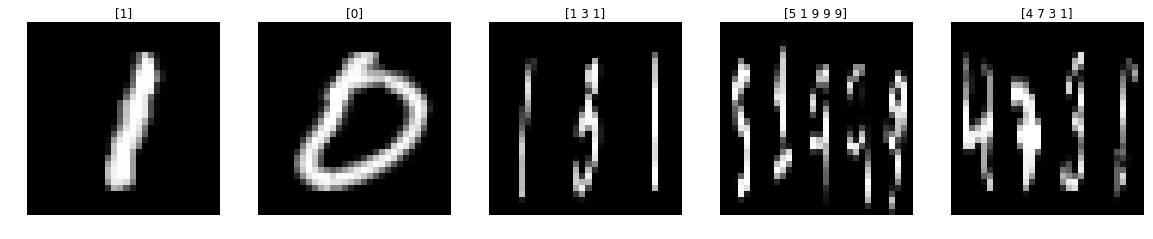

In [33]:
plt.rcParams['figure.figsize'] = (20.0, 20.0)
f, ax = plt.subplots(nrows=1, ncols=5)

im_samples = []
    
for i,j in enumerate(np.sort(np.random.randint(0, train_label.shape[0], size = 5))):
    im_samples.extend([j])
    ax[i].axis('off')
    label = train_label[j,1:1+train_label[j,0]]
    ax[i].set_title(label, loc='center')
    ax[i].imshow(train_img[j,:,:,0],cmap="gray")

----
## Step 2: Train a Model on a Realistic Dataset
Once you have settled on a good architecture, you can train your model on real data. In particular, the [Street View House Numbers (SVHN)](http://ufldl.stanford.edu/housenumbers/) dataset is a good large-scale dataset collected from house numbers in Google Street View. Training on this more challenging dataset, where the digits are not neatly lined-up and have various skews, fonts and colors, likely means you have to do some hyperparameter exploration to perform well.

### Implementation
Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [34]:
url = 'http://ufldl.stanford.edu/housenumbers/'
last_percent_reported = None

def download_progress_hook(count, blockSize, totalSize):
    """A hook to report the progress of a download."""
    global last_percent_reported
    percent = int(count * blockSize * 100 / totalSize)

    if last_percent_reported != percent:
        if percent % 5 == 0:
            sys.stdout.write("%s%%" % percent)
            sys.stdout.flush()
        else:
            sys.stdout.write(".")
            sys.stdout.flush()
        last_percent_reported = percent
        
def maybe_download(filename, force=False):
    """Download a file if not present, and make sure it's the right size."""
    if force or not os.path.exists(filename):
        print('Attempting to download:', filename) 
        filename, _ = urlretrieve(url + filename, filename, reporthook=download_progress_hook)
        print('\nDownload Complete!')
    statinfo = os.stat(filename)
    return filename

train_filename = maybe_download('train.tar.gz')
test_filename = maybe_download('test.tar.gz')
extra_filename = maybe_download('extra.tar.gz')

In [240]:
np.random.seed(0)
train_filename = maybe_download('train.tar.gz')
test_filename = maybe_download('test.tar.gz')
def maybe_extract(filename, force=False):
    root = os.path.splitext(os.path.splitext(filename)[0])[0]  # remove .tar.gz
    if os.path.isdir(root) and not force:
        # You may override by setting force=True.
        print('%s already present - Skipping extraction of %s.' % (root, filename))
    else:
        print('Extracting data for %s. This may take a while. Please wait.' % root)
        tar = tarfile.open(filename)
        sys.stdout.flush()
        tar.extractall()
        tar.close()
    data_folders = root
    print(data_folders)
    return data_folders
  
train_folders = maybe_extract(train_filename)
test_folders = maybe_extract(test_filename)
extra_folders = maybe_extract(extra_filename)

train already present - Skipping extraction of train.tar.gz.
train
test already present - Skipping extraction of test.tar.gz.
test
extra already present - Skipping extraction of extra.tar.gz.
extra


In [35]:
def getAttribute(f_input,idx,attr):
    attr=f_input[f_input['digitStruct']['bbox'][idx][0]][attr].value.squeeze()
    #The input file does not have consistent formatting
    try:
        return list(np.array([f_input[x].value for x in attr]).squeeze())
    except:
        return list(attr.reshape(-1))

In [36]:
def getDigit(f,i): 
    digit=f[f["digitStruct"]["name"][i][0]].value.tostring()
    digit=digit.replace('\x00','')
    return digit

In [37]:
import h5py
def get_data(path):
    f=h5py.File(path)
    len_data=f['digitStruct']['name'].shape[0]
    images=[]
#     labels=[]
#     heights=[]
#     widths=[]
#     tops=[]
#     lefts=[]
    attributes = ['top','left','height','width','label']
    print(path)
    for i in range(0,len_data):
        image_info = {}
        image_info['name'] = getDigit(f,i)
        for att in attributes:
            image_info[att]=getAttribute(f,i,att)
#         images.append(get_name(f, i))
#         labels.append(get_attr(f, i, 'label'))
#         heights.append(get_attr(f, i, 'height'))
#         widths.append(get_attr(f, i, 'width'))
#         lefts.append(get_attr(f, i, 'left'))
#         tops.append(get_attr(f, i, 'top'))
        images.append(image_info)
        if (i % 5000 == 0):
            print(i,len_data)
    
    return images#np.array(images),np.array(labels),np.array(heights),np.array(widths),np.array(lefts),np.array(tops)

In [38]:
def getMetaData(): # Get Metadata for each dataset
    train_dataset=dict()
    test_dataset=dict()
    extra_dataset=dict()
    train_dataset = get_data("train/digitStruct.mat")
    test_dataset = get_data("test/digitStruct.mat")
    #train_dataset["images"],train_dataset["labels"],train_dataset["heights"],train_dataset["widths"],\
    #train_dataset["lefts"],train_dataset["tops"]=get_data("train/digitStruct.mat")
    #test_dataset["images"],test_dataset["labels"],test_dataset["heights"],test_dataset["widths"],\
    #test_dataset["lefts"],test_dataset["tops"]=get_data("test/digitStruct.mat")
#     extra_dataset["images"],extra_dataset["labels"],extra_dataset["heights"],extra_dataset["widths"],\
#     extra_dataset["lefts"],extra_dataset["tops"]=get_data("extra/digitStruct.mat")
    return train_dataset,test_dataset#,extra_dataset

In [39]:
train_dataset,test_dataset=getMetaData()

train/digitStruct.mat
0 33402
5000 33402
10000 33402
15000 33402
20000 33402
25000 33402
30000 33402
test/digitStruct.mat
0 13068
5000 13068
10000 13068


In [40]:
def create_dataset(path,data):
    length=len(data)
    dataset = np.ndarray([length,32,32,3], dtype='float32')
    labels = np.ones([length,6], dtype=int)*10
    to_delete = []
    for i in xrange(length):
        image_name = data[i]['name']
        file_image = os.path.join(path,image_name)
        image = Image.open(file_image)
        num_digit = len(data[i]['label'])
        labels[i,0] = num_digit
        height = np.ndarray([num_digit], dtype='int')
        width = np.ndarray([num_digit], dtype='int')
        top = np.ndarray([num_digit], dtype='int')
        left = np.ndarray([num_digit], dtype='int')
        for j in np.arange(num_digit):
            if j < 5:
                labels[i,j+1] = data[i]['label'][j]
                if data[i]['label'][j] == 10: 
                    labels[i,j+1] = 0
            else: 
                
                to_delete.append(i)
                #print('Image',i,' has to be deleted.') # Delete image with more than 5 digits
                
            top[j] = data[i]['top'][j]
            left[j] = data[i]['left'][j]
            height[j] = data[i]['height'][j]
            width[j] = data[i]['width'][j]
        
        image_top = np.amin(top)
        image_left = np.amin(left)
        image_height = np.amax(top) + height[np.argmax(top)] - image_top
        image_width = np.amax(left) + width[np.argmax(left)] - image_left
        
        image_top = int(np.floor(image_top - 0.1 * image_height))
        image_left = int(np.floor(image_left - 0.1 * image_width))
        image_bottom = int(np.amin([np.ceil(image_top + 1.2 * image_height), image.size[1]]))
        image_right = int(np.amin([np.ceil(image_left + 1.2 * image_width), image.size[0]]))

        # Crop image according to the bouding box information.
        image = image.crop((image_left, image_top, image_right, image_bottom)).resize([32,32], Image.ANTIALIAS)
        dataset[i,:,:,:] = image

    return dataset, labels

In [41]:
train_dataset,train_labels=create_dataset("train/",train_dataset)

In [248]:
train_dataset.shape

(33402, 32, 32, 3)

In [249]:
train_labels.shape

(33402, 6)

In [42]:
train_dataset = np.delete(train_dataset, 29929, axis=0)
train_labels = np.delete(train_labels, 29929, axis=0)

In [43]:
test_dataset,test_labels =create_dataset("test/",test_dataset)

In [252]:
def rgb2gray(data): # Similar to the rgb2gray function in MATLAB
    coeff_red=0.299
    coeff_green=0.587
    coeff_blue=0.114
    data=data[:,:,:,0]*coeff_red+data[:,:,:,1]*coeff_green+data[:,:,:,2]*coeff_blue
    return data

#train_dataset2=rgb2gray(train_dataset)
#valid_dataset=rgb2gray(valid_dataset)
#test_dataset2=rgb2gray(test_dataset)



In [44]:
def normalize(dataset):
    for i in range(0,dataset.shape[0]):
        dataset[i,:,:]=(dataset[i,:,:]-dataset[i,:,:].mean())/dataset[i,:,:].std()
    return dataset

train_dataset=normalize(train_dataset)
#valid_dataset=normalize(valid_dataset)
test_dataset=normalize(test_dataset)

In [91]:
print test_dataset.shape
#test_dataset2.shape

SyntaxError: invalid syntax (<ipython-input-91-58c0c73f49f7>, line 1)

In [45]:
valid_dataset = test_dataset[:6000]
valid_labels = test_labels[:6000]
test_dataset = test_dataset[6000:]
test_labels = test_labels[6000:]

In [46]:
pickle_file = os.path.join('concat_MNIST', 'SVHN_final.pickle')

try:
  f = open(pickle_file, 'wb')
  save = {
    'train_dataset': train_dataset,
    'train_labels': train_labels,
    'valid_dataset': valid_dataset,
    'valid_labels': valid_labels,
    'test_dataset': test_dataset,
    'test_labels': test_labels,
    }
  pickle.dump(save, f, pickle.HIGHEST_PROTOCOL)
  f.close()
except Exception as e:
  print('Unable to save data to', pickle_file, ':', e)
  raise
    

In [49]:

def accuracy(predictions, labels):
    return (100.0 * np.sum(np.argmax(predictions, 2).T == labels) / predictions.shape[1] / predictions.shape[0])


# In[4]:
real_dataset = np.zeros(train_dataset.shape,dtype='float32')
image_size = 32
num_labels = 11  # 0-9, + blank 
num_channels = 3 # grayscale
num_digits = 5

batch_size = 64
patch1_size = 3
patch2_size = 5
depth1 = 1
depth2 = 16
depth3 = 32
depth4 = 64
num_hidden1 = 64
num_hidden2 = 64

graph = tf.Graph()
with graph.as_default():
    # Input data.
    tf_train_dataset = tf.placeholder(tf.float32, shape=(batch_size, image_size, image_size, num_channels))
    tf_train_labels = tf.placeholder(tf.int32, shape=(batch_size, num_digits+1))
    tf_valid_dataset = tf.constant(valid_dataset,dtype='float32')
    tf_test_dataset = tf.constant(test_dataset,dtype='float32')
    
    # Variables.
    layer1_weights = tf.get_variable("W1", shape=[patch1_size, patch1_size, num_channels, depth1],dtype='float32',                                    initializer=tf.contrib.layers.xavier_initializer_conv2d())
    layer1_biases = tf.Variable(tf.constant(1.0, shape=[depth1],dtype='float32_ref'), name='B1')
    
    layer2_weights = tf.get_variable("W2", shape=[patch1_size, patch1_size, depth1, depth2],dtype='float32',                                    initializer=tf.contrib.layers.xavier_initializer_conv2d())
    layer2_biases = tf.Variable(tf.constant(1.0, shape=[depth2],dtype='float32_ref'), name='B2')
    
    layer3_weights = tf.get_variable("W3", shape=[patch2_size, patch2_size, depth2, depth3],dtype='float32',                                    initializer=tf.contrib.layers.xavier_initializer_conv2d())
    layer3_biases = tf.Variable(tf.constant(1.0, shape=[depth3],dtype='float32_ref'), name='B3')
    
    layer4_weights = tf.get_variable("W4", shape=[patch2_size, patch2_size, depth3, num_hidden1],dtype='float32',                                    initializer=tf.contrib.layers.xavier_initializer_conv2d())
    layer4_biases = tf.Variable(tf.constant(1.0, shape=[num_hidden1],dtype='float32_ref'), name='B4')

    # Sequence length
    ss_w = tf.get_variable("WSS", shape=[num_hidden2, num_digits + 1],                           initializer=tf.contrib.layers.xavier_initializer())
    ss_b = tf.Variable(tf.constant(1.0, shape=[num_digits+1]), name='BSS')
    
    # Digits
    s1_w = tf.get_variable("WS1", shape=[num_hidden2, num_labels],dtype='float32',                           initializer=tf.contrib.layers.xavier_initializer())
    s1_b = tf.Variable(tf.constant(1.0, shape=[num_labels],dtype='float32_ref'), name='BS1')
    s2_w = tf.get_variable("WS2", shape=[num_hidden2, num_labels],dtype='float32',                           initializer=tf.contrib.layers.xavier_initializer())
    s2_b = tf.Variable(tf.constant(1.0, shape=[num_labels],dtype='float32_ref'), name='BS2')
    s3_w = tf.get_variable("WS3", shape=[num_hidden2, num_labels],dtype='float32',                           initializer=tf.contrib.layers.xavier_initializer())
    s3_b = tf.Variable(tf.constant(1.0, shape=[num_labels],dtype='float32_ref'), name='BS3')   
    s4_w = tf.get_variable("WS4", shape=[num_hidden2, num_labels],dtype='float32',                           initializer=tf.contrib.layers.xavier_initializer())
    s4_b = tf.Variable(tf.constant(1.0, shape=[num_labels],dtype='float32_ref'), name='BS4') 
    s5_w = tf.get_variable("WS5", shape=[num_hidden2, num_labels],dtype='float32',                           initializer=tf.contrib.layers.xavier_initializer())
    s5_b = tf.Variable(tf.constant(1.0, shape=[num_labels],dtype='float32_ref'), name='BS5') 
    
    # Model.
    def model(data, keep_prob):
        conv = tf.nn.conv2d(data, layer1_weights, [1,1,1,1], 'VALID', name='C1')
        hidden = tf.nn.relu(conv + layer1_biases)
        lrn = tf.nn.local_response_normalization(hidden)
        #sub = tf.nn.max_pool(lrn, [1,2,2,1], [1,2,2,1], 'SAME', name='S1')
        #print lrn.get_shape().as_list()

        conv = tf.nn.conv2d(lrn, layer2_weights, [1,1,1,1], 'VALID', name='C2')
        hidden = tf.nn.relu(conv + layer2_biases)
        lrn = tf.nn.local_response_normalization(hidden)
        sub = tf.nn.max_pool(lrn, [1,2,2,1], [1,2,2,1], 'SAME', name='S2')
        
        conv = tf.nn.conv2d(sub, layer3_weights, [1,1,1,1], padding='VALID', name='C3')
        hidden = tf.nn.relu(conv + layer3_biases)
        lrn = tf.nn.local_response_normalization(hidden)
        sub = tf.nn.max_pool(lrn, [1,2,2,1], [1,2,2,1], 'SAME', name='S3')
        
        conv = tf.nn.conv2d(sub, layer4_weights, [1,1,1,1], padding='VALID', name='C4')
        hidden = tf.nn.relu(conv + layer4_biases)
        hidden = tf.nn.dropout(hidden, keep_prob)
        shape = hidden.get_shape().as_list()
        reshape = tf.reshape(hidden, [shape[0], shape[1] * shape[2] * shape[3]])

        logits0 = tf.matmul(reshape, ss_w) + ss_b
        # This concat only allow us to have a one hot vector like the others (to pack the results in the following lines)
        logits0 = tf.concat(1, [logits0, tf.zeros([shape[0],5])])
        logits1 = tf.matmul(reshape, s1_w) + s1_b
        logits2 = tf.matmul(reshape, s2_w) + s2_b
        logits3 = tf.matmul(reshape, s3_w) + s3_b
        logits4 = tf.matmul(reshape, s4_w) + s4_b
        logits5 = tf.matmul(reshape, s5_w) + s5_b
        return [logits0, logits1, logits2, logits3, logits4, logits5]
    
    # Training computation.
    [logits0, logits1, logits2, logits3, logits4, logits5] = model(tf_train_dataset, 0.975)
    loss = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(logits0, tf_train_labels[:,0])) +        tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(logits1, tf_train_labels[:,1])) +        tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(logits2, tf_train_labels[:,2])) +        tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(logits3, tf_train_labels[:,3])) +        tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(logits4, tf_train_labels[:,4])) +        tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(logits5, tf_train_labels[:,5]))
        
    # Optimizer.
    global_step = tf.Variable(0)
    learning_rate = tf.train.exponential_decay(0.06, global_step, 10000, 0.90)
    optimizer = tf.train.AdagradOptimizer(learning_rate).minimize(loss, global_step=global_step)
    #optimizer = tf.train.RMSPropOptimizer(learning_rate).minimize(loss, global_step=global_step)
    #optimizer = tf.train.MomentumOptimizer(learning_rate,0.9).minimize(loss, global_step=global_step)
    
    
    # Predictions for the training, validation, and test data.
    train_prediction = tf.pack([tf.nn.softmax(model(tf_train_dataset, 1.0)[0]),tf.nn.softmax(model(tf_train_dataset, 1.0)[1]),                                tf.nn.softmax(model(tf_train_dataset, 1.0)[2]),                                tf.nn.softmax(model(tf_train_dataset, 1.0)[3]),                                tf.nn.softmax(model(tf_train_dataset, 1.0)[4]),                                tf.nn.softmax(model(tf_train_dataset, 1.0)[5])])
    valid_prediction = tf.pack([tf.nn.softmax(model(tf_valid_dataset, 1.0)[0]),tf.nn.softmax(model(tf_valid_dataset, 1.0)[1]),                                tf.nn.softmax(model(tf_valid_dataset, 1.0)[2]),                                tf.nn.softmax(model(tf_valid_dataset, 1.0)[3]),                                tf.nn.softmax(model(tf_valid_dataset, 1.0)[4]),                                tf.nn.softmax(model(tf_valid_dataset, 1.0)[5])])
    test_prediction = tf.pack([tf.nn.softmax(model(tf_test_dataset, 1.0)[0]),tf.nn.softmax(model(tf_test_dataset, 1.0)[1]),                                tf.nn.softmax(model(tf_test_dataset, 1.0)[2]),                                tf.nn.softmax(model(tf_test_dataset, 1.0)[3]),                                tf.nn.softmax(model(tf_test_dataset, 1.0)[4]),                                tf.nn.softmax(model(tf_test_dataset, 1.0)[5])])
    tf_camera_data = tf.constant(real_dataset)
    real_prediction = tf.pack([tf.nn.softmax(model(tf_camera_data, 1.0)[0]),tf.nn.softmax(model(tf_camera_data, 1.0)[1]),tf.nn.softmax(model(tf_camera_data, 1.0)[2]),tf.nn.softmax(model(tf_camera_data, 1.0)[3]),tf.nn.softmax(model(tf_camera_data, 1.0)[4]),tf.nn.softmax(model(tf_camera_data, 1.0)[5])])
    saver = tf.train.Saver()


# In[ ]:

# For visualization



# In[5]:



In [50]:
acc_synthetic_batch = []
acc_synthetic_valid = []

acc_SVHN_batch = []
acc_SVHN_valid = []

In [52]:
filename = "Models/Synthetic_Model.ckpt"
num_steps = 10000

with tf.Session(graph=graph) as session:
    tf.initialize_all_variables().run()  
    
    if os.path.exists(filename):
        reader = tf.train.NewCheckpointReader(filename)
        reader.get_variable_to_shape_map()
        saver.restore(session, filename)
        print('Model restored.')
    print('Initialized')
  
    for step in range(num_steps):
        offset = (step * batch_size) % (train_labels.shape[0] - batch_size)
        batch_data = train_dataset[offset:(offset + batch_size), :, :, :]
        batch_labels = train_labels[offset:(offset + batch_size),:]
        feed_dict = {tf_train_dataset : batch_data, tf_train_labels : batch_labels}
        
        _, l, predictions = session.run([optimizer, loss, train_prediction], feed_dict=feed_dict)
        
        if (step % 500 == 0): 
            acc_batch = accuracy(predictions, batch_labels[:,0:])
            acc_valid = accuracy(valid_prediction.eval(), valid_labels[:,0:])
            acc_synthetic_batch.append(acc_batch)
            acc_synthetic_valid.append(acc_valid)
            print('Minibatch loss at step %d: %f' % (step, l))
            print('Minibatch accuracy: %.1f%%' % acc_batch)
            print('Validation accuracy: %.1f%%' % acc_valid)
            
    print('Test accuracy: %.1f%%' % accuracy(test_prediction.eval(), test_labels[:,0:]))
    save_path = saver.save(session, "model")
    print("Model saved in file: %s" % save_path)    



Instructions for updating:
Use `tf.global_variables_initializer` instead.
Initialized
Minibatch loss at step 0: 16.930468
Minibatch accuracy: 1.8%
Validation accuracy: 62.6%
Minibatch loss at step 500: 6.792681
Minibatch accuracy: 63.8%
Validation accuracy: 65.7%
Minibatch loss at step 1000: 6.132013
Minibatch accuracy: 64.8%
Validation accuracy: 69.1%
Minibatch loss at step 1500: 4.185883
Minibatch accuracy: 75.5%
Validation accuracy: 77.7%
Minibatch loss at step 2000: 4.515056
Minibatch accuracy: 77.3%
Validation accuracy: 82.2%
Minibatch loss at step 2500: 3.933850
Minibatch accuracy: 82.3%
Validation accuracy: 85.5%
Minibatch loss at step 3000: 2.372566
Minibatch accuracy: 89.3%
Validation accuracy: 86.7%
Minibatch loss at step 3500: 3.444042
Minibatch accuracy: 81.0%
Validation accuracy: 87.3%
Minibatch loss at step 4000: 3.187085
Minibatch accuracy: 82.8%
Validation accuracy: 87.6%
Minibatch loss at step 4500: 2.750700
Minibatch accuracy: 86.5%
Validation accuracy: 88.4%
Minibatc

### Question 4
_Describe how you set up the training and testing data for your model. How does the model perform on a realistic dataset?_

**Answer:**  The steps i performed are as follows :
1. Dowloaded the testing and training file from the svhn url and extracted them.
2. Using h5py Python module , I opened the DigitStruct.mat files and extracting information from it.
3. I extracted the co-ordinates of the bounding box as well as the digit labels from the .mat file.
4. Delete images with more than 5 digits.
5. Then I create a bounding box using the top left and bottom right co-ordinates among all bounding boxes in an image .
6. Cropped the image around the bounding box .
7. Reshaped the image to 32x32.
8. Normalized the images [Reference](http://stats.stackexchange.com/questions/211436/why-do-we-normalize-images-by-subtracting-the-datasets-image-mean-and-not-the-c) 
9. Split the testing file into validation and testing dataset of size 6000 and 7068 respectively .
10. Saved the datasets into pickle format for later use .

I achieved an accuracy of 89.4% for the test dataset using this model . Peak validation accuracy was around 89.8% . I believe the model didn't overfit since the the accuracy seemed to improve with increasing epochs and the validation and minibatch accuracy improved almost at the same pace .  Please note that I could not use the images in the extra  file to create a larger dataset due to computational limitations of my system . I think with larger datasets and some more parameter tuning I could have improved the final accuracy .

### Question 5
_What changes did you have to make, if any, to achieve "good" results? Were there any options you explored that made the results worse?_

**Answer:** Intially I had decided to resize all the images to size 100X60 . However , with this size , the model took more than 10 hours to train . Also the system would crash halfway through the computation . Hence, I decided on reducing the size of images and decreasing the number of epochs . Then I tried resizing the images to 32x32 as described above . This somewhat reduced the computation time allowing me to perform more parameter tuning . I combined the first two layers of the previous model by using a convolution layer of depth 16 and path 5x5 .This however worsen the result as compared to the default model (The one used in Step 1) .I also did not change the images to grayscale and somehow my accuracy seemed to improve by almost 2% . Then I tried expirementing with various optimizers and finally settled with the [Adagrad optimizer](www.jmlr.org/papers/volume12/duchi11a/duchi11a.pdf). I also played around with the larning rate and decay rate . Some values lead to error in calculating the loss (NaN values) . I believe using images with higher resolution might have improved the accuracy since the digits are blurred out in the small size . 

### Question 6
_What were your initial and final results with testing on a realistic dataset? Do you believe your model is doing a good enough job at classifying numbers correctly?_

**Answer:** The intial results were 85% . After some parameter tuning and modifying the model I achieved final score of 89.4% . I think this is good enough , given the limited computational resources I had . However I beleive this accuracy is not good enough to be used in production environment . There is definitely much room for improvement . 

----
## Step 3: Test a Model on Newly-Captured Images

Take several pictures of numbers that you find around you (at least five), and run them through your classifier on your computer to produce example results. Alternatively (optionally), you can try using OpenCV / SimpleCV / Pygame to capture live images from a webcam and run those through your classifier.

### Implementation
Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [259]:
import matplotlib.pyplot as plt
### Your code implementation goes here.
### Feel free to use as many code cells as needed.
def get_camera_images():
    imagelist = listdir('camera-pic/')
    loaded_images = []
    for image in imagelist:
        with Image.open('camera-pic/'+image) as img:
            img = img.resize((32, 32), Image.BILINEAR)
            plt.figure()
            plt.imshow(img)
            im = np.asarray(img)
            loaded_images.append(im.reshape(32, 32, 3))
    return np.array(loaded_images)




Camera result is
 [[5 5 5 5 5]
 [4 4 4 4 4]
 [9 9 9 9 9]
 [6 6 6 6 6]
 [1 1 1 1 1]
 [0 0 0 0 0]]


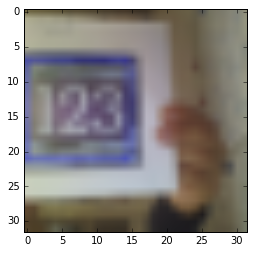

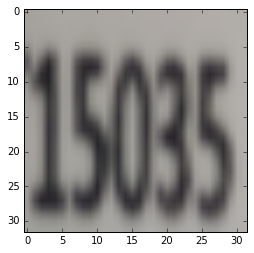

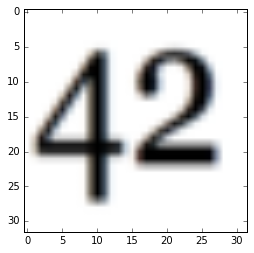

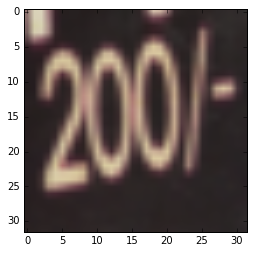

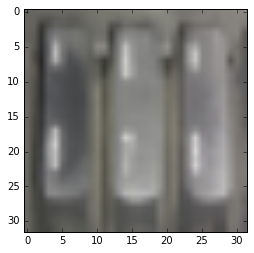

In [276]:
with graph.as_default():
    tf_camera_data = tf.cast(tf.constant(get_camera_images()), tf.float32)
    
with tf.Session(graph=graph) as session:
    tf.initialize_all_variables().run()
    camera_image_pred = tf.pack([tf.nn.softmax(model(tf_camera_data, 1.0)[0]),tf.nn.softmax(model(tf_camera_data, 1.0)[1]),tf.nn.softmax(model(tf_camera_data, 1.0)[2]),tf.nn.softmax(model(tf_camera_data, 1.0)[3]),tf.nn.softmax(model(tf_camera_data, 1.0)[4]),tf.nn.softmax(model(tf_camera_data, 1.0)[5])])
    print('Camera result is\n {}'.format(np.argmax(camera_image_pred.eval(),2)))

In [279]:
from PIL import Image
img_files = ["pic1.jpg","pic2.jpg","pic3.jpg","pic4.png","pic5.png"]
real_dataset = []
for key in img_files:
    img = Image.open("camera-pic/"+key)
    img = img.resize((32,32))
    pdata = img.getdata()
    sdata = []
    #for pixil in pdata:
    #    Gray = (pixil[0] + pixil[1] + pixil[2])/3
    #    sdata.append(Gray)
    real_dataset.append(pdata)
real_dataset = np.array(real_dataset).astype(np.float32)
real_dataset = real_dataset.reshape(5,32,32,3)

In [283]:
sess = tf.Session(graph=graph)
new_saver = tf.train.import_meta_graph('model.meta')
new_saver.restore(sess, tf.train.latest_checkpoint('./'))
all_vars = tf.trainable_variables()
prediction = real_prediction.eval(session = sess)

In [284]:
label = []
print (prediction.shape)
for i in range(5):
    digit = []
    for j in prediction[:,i,:]:
        digit.append(np.argmax(j))
    label.append(digit)
print(label) 

(6, 5, 11)
[[4, 2, 6, 7, 4, 10], [3, 5, 6, 8, 10, 10], [4, 1, 5, 10, 9, 10], [3, 4, 2, 10, 10, 10], [3, 4, 3, 10, 10, 10]]


### Question 7
_Choose five candidate images of numbers you took from around you and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult?_

**Answer:** There is an image with digits occuring along with special characters like '/' and '-' which is confusing the classifier .

### Question 8
_Is your model able to perform equally well on captured pictures or a live camera stream when compared to testing on the realistic dataset?_

**Answer:** The model is not able to identify the real world images correctly . This maybe due to the fact that the resolution is quite low and the digits get diminished . The model is not able to predict digits in real world datasets and has very poor accuracy .

### Optional: Question 9
_If necessary, provide documentation for how an interface was built for your model to load and classify newly-acquired images._

**Answer:** Leave blank if you did not complete this part.

----
### Step 4: Explore an Improvement for a Model

There are many things you can do once you have the basic classifier in place. One example would be to also localize where the numbers are on the image. The SVHN dataset provides bounding boxes that you can tune to train a localizer. Train a regression loss to the coordinates of the bounding box, and then test it. 

### Implementation
Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [56]:
import tarfile
import h5py
import os.path
import numpy as np
import cPickle as pickle
from os import listdir
from PIL import Image
from six.moves.urllib.request import urlretrieve

path='train/'
url = "http://ufldl.stanford.edu/housenumbers/"
metadata = {}
metadata['height'] = []
metadata['label'] = []
metadata['left'] = []
metadata['top'] = []
metadata['width'] = []

def maybe_download(filename, path, expected_bytes):
    """Download and extract file if not present in the current directory"""
    if not os.path.exists(filename):
        filename, _ = urlretrieve(url+filename, filename)
    statinfo = os.stat(filename)
    if statinfo.st_size == expected_bytes:
        print('Found and verified %s' % filename)
        with tarfile.open(filename) as f:
            f.extractall()
    else:
        print(statinfo.st_size)
        raise Exception(
            'Failed to verify' + filename)
    return filename

maybe_download("train.tar.gz", 'train/', 404141560)

def print_attrs(name, obj):
    vals = []
    if obj.shape[0] == 1:
        vals.append(obj[0][0])
    else:
        for k in range(obj.shape[0]):
            vals.append(f[obj[k][0]][0][0])
            metadata[name].append(vals)

f = h5py.File('train/digitStruct.mat')
for item in f['/digitStruct/bbox']:
    f[item[0]].visititems(print_attrs)

pickle_file = path+'metadata.pickle'
try:
    with open(pickle_file, 'wb') as pf:
        pickle.dump(metadata, pf)
except Exception as e:
    print('Unable to save data to', pickle_file, ':', e)
    raise


def one_hot_encode(labels):
    b = np.zeros((len(labels), 6, 11))
    b[:, :, 10] = 1
    for img_num in range(len(labels)):
        for index, num in enumerate(labels[img_num]):
            print
            b[img_num, index, num] = 1
            b[img_num, index, 10] = 0
    return b


def pad_list(l):
    y = np.array([x + [0] * (6 - len(x)) for x in l])
    return y


def get_bounding_box_as_array(metadata, offset, batch_size):
    for key in metadata:
        metadata[key] = pad_list(metadata[key][offset:offset+batch_size])
    bbox = np.zeros((batch_size, 6, 4))

    bbox[:, :, 0] = metadata['top']
    bbox[:, :, 1] = metadata['left']
    bbox[:, :, 2] = metadata['height']
    bbox[:, :, 3] = metadata['width']
    return bbox


def get_train_data(path, offset, batch_size):
    with open(path + 'metadata.pickle', 'rb') as f:
        metadata = pickle.load(f)

    if not os.path.isfile(path+'imagelist.pickle'):
        imagelist = filter(lambda x: 'png' in x, listdir(path))
        imagelist = sorted(imagelist, key=lambda x: int(filter(str.isdigit, x)))
        
        with open(path+'imagelist.pickle', 'wb') as f:
            pickle.dump(imagelist, f)
    else:
        with open(path+'imagelist.pickle', 'rb') as f:
            imagelist = pickle.load(f)

    loaded_images = []
    for image in imagelist[offset:offset+batch_size]:
        img = Image.open(path+image)
        img = img.convert('L').resize((32, 32), Image.BILINEAR)
        im = np.asarray(img)
        loaded_images.append(im.reshape(32, 32, 1))

    ytrain = metadata['label'][offset:offset+batch_size]
    ytrain = one_hot_encode(ytrain)
    bbox = get_bounding_box_as_array(metadata, offset, batch_size)
    return np.array(loaded_images), np.array(ytrain), bbox

Found and verified train.tar.gz


In [57]:
Xvalid, yvalid, bbox_valid = get_train_data('train/', offset, 64)
offset += batch_size
Xtest, ytest, bbox_test = get_train_data('train/', offset, 64)
offset += batch_size

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [233]:
def weight_var(shape):
    return tf.Variable(tf.truncated_normal(shape, stddev=0.1), name='Weight')


def bias_var(shape):
    return tf.Variable(tf.constant(1.0, shape=shape), name='bias')


def accuracy(pred, labels):
    return (100.0 * np.sum(
        np.argmax(pred, 2) == np.argmax(labels, 2)) / pred.shape[0])/6


def variable_summaries(var):
    with tf.name_scope('summaries'):
        mean = tf.reduce_mean(var)
        tf.summary.scalar('mean', mean)
        with tf.name_scope('stddev'):
            stddev = tf.sqrt(tf.reduce_mean(tf.square(var-mean)))
        tf.summary.scalar('stddev', stddev)
        tf.summary.scalar('max', tf.reduce_max(var))
        tf.summary.histogram('histogram', var)


def conv2d(data, wt, bias, stride=[1, 2, 2, 1]):
#     variable_summaries(wt)
#     variable_summaries(bias)
    return tf.nn.dropout(tf.nn.relu(tf.nn.conv2d(data, wt, stride, padding='SAME', name='convolution') + bias,
                                    name='relu'), 0.80, name='dropout')


offset = 0
image_height = 32
image_width = 32
num_channels = 1
num_labels = 11
num_digits = 6

batch_size = 64
patch_size = 5
depth = 32
num_hidden1 = 1024
reg_hidden1 = 1024
reg_hidden2 = 512



# print dimensions
print("Xvalid shape is {} and yvalid shape is {} and bbox is {}"
      .format(Xvalid.shape, yvalid.shape, bbox_valid.shape))
print('y is \n{}\nbbox is \n{}'
      .format(yvalid[0], bbox_valid[0]))

# build a graph
graph = tf.Graph()
with graph.as_default():
    tf_train_dataset = tf.placeholder(
        tf.float32, shape=(batch_size,
                           image_width, image_height, num_channels))
    tf_train_labels = tf.placeholder(
        tf.float32, shape=(batch_size, num_digits, num_labels))
    tf_valid_dataset = tf.cast(tf.constant(Xvalid), tf.float32)
    tf_train_bbox = tf.placeholder(tf.float32,
                                   shape=(batch_size, num_digits, 4))
    tf_test_dataset = tf.cast(tf.constant(Xtest), tf.float32)
    #tf_camera_data = tf.cast(tf.constant(get_camera_images()), tf.float32)

    # Create variables
    # convolutions layer 1
    layer1_W = weight_var([patch_size, patch_size, num_channels, depth])
    layer1_bias = bias_var([depth])

    # layer2
    layer2_W = weight_var([patch_size, patch_size, depth, depth*2])
    layer2_bias = bias_var([depth*2])

    # layer3
    layer3_W = weight_var([patch_size, patch_size, depth*2, depth*2])
    layer3_bias = bias_var([depth*2])

    # layer4
    layer4_W = weight_var([patch_size, patch_size, depth*2, depth*2])
    layer4_bias = bias_var([depth*2])

    # layer5
    layer5_W = weight_var([patch_size, patch_size, depth*2, depth*2])
    layer5_bias = bias_var([depth*2])

    # convolution layer 6
    layer6_W = weight_var([patch_size, patch_size, depth*2, depth*4])
    layer6_bias = bias_var([depth*4])

    # convolution layer 7
    layer7_W = weight_var([patch_size, patch_size, depth*4, depth*4])
    layer7_bias = bias_var([depth*4])

    # Regression head
    fc1_reg_W = weight_var([image_height//16*image_width//16*depth*4, reg_hidden1])
    fc1_reg_bias = bias_var([reg_hidden1])

    fc2_reg_W = weight_var([reg_hidden1, reg_hidden2])
    fc2_reg_bias = bias_var([reg_hidden2])

    fc3_reg_Ws = [weight_var([reg_hidden2, 4]) for _ in range(num_digits)]
    fc3_reg_biases = [bias_var([4]) for _ in range(num_digits)]

    # Classification head
    c1_W = weight_var([image_height//16*image_width//16*depth*4, num_hidden1])
    c1_bias = bias_var([num_hidden1])

    c3_Ws = [weight_var([num_hidden1, num_labels])
             for _ in range(num_digits)]
    c3_biases = [bias_var([num_labels]) for _ in range(num_digits)]

    # Design model
    def model(data):
        with tf.name_scope('conv1'):
            conv1 = conv2d(data, layer1_W, layer1_bias)
        with tf.name_scope('conv2'):
            conv2 = conv2d(conv1, layer2_W, layer2_bias)
        with tf.name_scope('conv3'):
            conv3 = conv2d(conv2, layer3_W, layer3_bias)
        with tf.name_scope('conv4'):
            conv4 = conv2d(conv3, layer4_W, layer4_bias, stride=[1, 1, 1, 1])
        with tf.name_scope('conv5'):
            conv5 = conv2d(conv4, layer5_W, layer5_bias, stride=[1, 1, 1, 1])
        with tf.name_scope('conv6'):
            conv6 = conv2d(conv5, layer6_W, layer6_bias)
        with tf.name_scope('conv7'):
            conv7 = conv2d(conv6, layer7_W, layer7_bias, stride=[1, 1, 1, 1])
        with tf.name_scope('reshape'):
            shape = conv7.get_shape().as_list()
            reshaped = tf.reshape(conv7, [shape[0], shape[1] * shape[2] * shape[3]])

        # Regression head for bounding box prediction
        with tf.name_scope('reg1'):
            reg1 = tf.nn.relu(tf.matmul(reshaped, fc1_reg_W) + fc1_reg_bias)
        with tf.name_scope('reg2'):
            reg2 = tf.nn.relu(tf.matmul(reg1, fc2_reg_W) + fc2_reg_bias)
        with tf.name_scope('reg_list'):
            bbox_pred = [tf.matmul(reg2, fc3_reg_W) + fc3_reg_bias
                     for fc3_reg_W, fc3_reg_bias in zip(fc3_reg_Ws, fc3_reg_biases)]
        with tf.name_scope('transpose'):
            bbox_pred = tf.transpose(tf.pack(bbox_pred), [1, 0, 2])

        # classification head
        with tf.name_scope('classify1'):
            hidden1 = tf.nn.relu(tf.matmul(reshaped, c1_W) + c1_bias)
        with tf.name_scope('classify_list'):
            logits = tf.pack([tf.matmul(hidden1, c3_W) + c3_bias
                          for c3_W, c3_bias in zip(c3_Ws, c3_biases)])
            logits = tf.transpose(logits, [1, 0, 2])
        return logits, bbox_pred

    logits, train_bbox_pred = model(tf_train_dataset)
    loss_per_digit = [tf.reduce_mean(
        tf.nn.softmax_cross_entropy_with_logits(logits[:, i, :], tf_train_labels[:, i, :]))
                      for i in range(num_digits)]
    with tf.name_scope('loss'):
        loss = tf.add_n(loss_per_digit, name='loss')
        bbox_loss = tf.nn.l2_loss(train_bbox_pred - tf_train_bbox, name='reg_loss')

#     tf.summary.scalar('loss', loss)
#     tf.summary.scalar('bbox_loss', bbox_loss)
#     merged = tf.summary.merge_all_summaries()
    #train_writer = tf.train.SummaryWriter('log', graph)

    # optimizer
    global_step = tf.Variable(0, trainable=False)
    starter_learning_rate = 0.005
    learning_rate = tf.train.exponential_decay(starter_learning_rate,
                                               global_step, 5, 0.90,
                                               staircase=True)
    optimizer = tf.train.AdamOptimizer(
        learning_rate).minimize(loss, global_step=global_step)
    bbox_optimizer = tf.train.AdamOptimizer(
        learning_rate).minimize(bbox_loss, global_step=global_step)

    # Predictions
    valid_logits, valid_bbox_pred = model(tf_valid_dataset)
    test_logits, test_bbox_pred = model(tf_test_dataset)
    #camera_logits, camera_bbox_pred = model(tf_camera_data)
    train_pred = tf.nn.softmax(logits)
    valid_pred = tf.nn.softmax(valid_logits)
    test_pred = tf.nn.softmax(test_logits)
    #camera_image_pred = tf.nn.softmax(camera_logits)

with tf.Session(graph=graph) as session:
    tf.initialize_all_variables().run() 
    print('Initialized')

    for step in range(301):
        batch_data, batch_label, bbox = get_train_data('train/', offset, batch_size)
        offset += batch_size
        feed_dict = {tf_train_dataset: batch_data,
                     tf_train_labels: batch_label,
                     tf_train_bbox: bbox}
        _, l, predictions, _, bbox_cost, summary = session.run(
            [optimizer, loss, train_pred, bbox_optimizer, bbox_loss,[]],
            feed_dict=feed_dict)
        #train_writer.add_summary(summary, i)
        if step % 10 == 0:
            print('Minibatch accuracy at step {} : {} and loss is {}'.format(
                step, accuracy(predictions, batch_label), l))
            print('Validation accuracy is {}'.format(
                accuracy(valid_pred.eval(), yvalid)))
            print('Regression loss at {} is {}'.format(step, bbox_cost))

    print('Test accuracy is \n{}'.format(accuracy(test_pred.eval(), ytest)))
    #camera_label_pred =  camera_image_pred.eval()
    #camera_bbox = camera_bbox_pred.eval()
    #print('Camera result is \n{} and bbox is \n{}'.format(
    #    np.argmax(camera_label_pred, 2), camera_bbox))

Xvalid shape is (64, 32, 32, 1) and yvalid shape is (64, 6, 11) and bbox is (64, 6, 4)
y is 
[[ 0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]]
bbox is 
[[  1.  14.  19.  10.]
 [  1.  24.  19.  11.]
 [  1.  36.  19.  11.]
 [  0.   0.   0.   0.]
 [  0.   0.   0.   0.]
 [  0.   0.   0.   0.]]
Initialized


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:63: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


Minibatch accuracy at step 0 : 5.46875 and loss is 71463.265625
Validation accuracy is 62.2395833333
Regression loss at 0 is 75214815232.0
Minibatch accuracy at step 10 : 56.5104166667 and loss is 109.793884277
Validation accuracy is 56.5104166667
Regression loss at 10 is 1071955.375
Minibatch accuracy at step 20 : 57.03125 and loss is 41.980255127
Validation accuracy is 56.25
Regression loss at 20 is 637922.875
Minibatch accuracy at step 30 : 57.5520833333 and loss is 31.075296402
Validation accuracy is 60.15625
Regression loss at 30 is 797090.75
Minibatch accuracy at step 40 : 55.9895833333 and loss is 20.4764156342
Validation accuracy is 60.15625
Regression loss at 40 is 912621.1875
Minibatch accuracy at step 50 : 59.8958333333 and loss is 19.5099105835
Validation accuracy is 61.1979166667
Regression loss at 50 is 859942.375
Minibatch accuracy at step 60 : 60.6770833333 and loss is 19.2928371429
Validation accuracy is 63.28125
Regression loss at 60 is 553545.4375
Minibatch accuracy 

### Question 10
_How well does your model localize numbers on the testing set from the realistic dataset? Do your classification results change at all with localization included?_

**Answer:**

### Question 11
_Test the localization function on the images you captured in **Step 3**. Does the model accurately calculate a bounding box for the numbers in the images you found? If you did not use a graphical interface, you may need to investigate the bounding boxes by hand._ Provide an example of the localization created on a captured image.

**Answer:**

----
## Optional Step 5: Build an Application or Program for a Model
Take your project one step further. If you're interested, look to build an Android application or even a more robust Python program that can interface with input images and display the classified numbers and even the bounding boxes. You can for example try to build an augmented reality app by overlaying your answer on the image like the [Word Lens](https://en.wikipedia.org/wiki/Word_Lens) app does.

Loading a TensorFlow model into a camera app on Android is demonstrated in the [TensorFlow Android demo app](https://github.com/tensorflow/tensorflow/tree/master/tensorflow/examples/android), which you can simply modify.

If you decide to explore this optional route, be sure to document your interface and implementation, along with significant results you find. You can see the additional rubric items that you could be evaluated on by [following this link](https://review.udacity.com/#!/rubrics/413/view).

### Optional Implementation
Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [ ]:


### Your optional code implementation goes here.
### Feel free to use as many code cells as needed.



### Documentation
Provide additional documentation sufficient for detailing the implementation of the Android application or Python program for visualizing the classification of numbers in images. It should be clear how the program or application works. Demonstrations should be provided. 

_Write your documentation here._

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.